<a href="https://colab.research.google.com/github/e4c5/scrabble-analytics/blob/master/wyc2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datascience Meets Scrabble.
## An anlysis of player performance vs final position at the WESPA Youth Cup.

"The final ranking of players by the customary win-loss record and cumulative spread should be equivalent to a ranking according to their level of performance in the tournament. Three possible ways of measuring the latter are to average the final rankings of the opponents of each player (Average Opponent Ranking or AOR, to add the number of wins and spread of the opponents of each players (Sum of Opponent Scores, SOS or Buchholz), and uninitialised iterated performance ratings (IPR, the ratings that players would have if they had all arrived at the tournament unrated)." - John Chew. http://www.poslarchive.com/tsh/doc/pairing.html

In this analysis Average Opponent Rank and Buchholz scores are used with two other metrics, Average Rank - the mean of the positions occupied by a player and Sonneborn - Berger score.

It is very important to note that you cannot reach a conclusion about the fairness of a pairing system by looking at one or two players in isolation.  There will always be a few players who get a much easier draw or a tougher draw than the rest. The objective of a good pairing system is to minimize that number. A good pairing system would also the squared sum of the distances of each player from his ideal placement based on his perfomance vs the actual placement.

If you don't want to do a lot of reading, just scroll down to the end. If you want to try some analysis of your own, clone this notebook and work on it.

In [0]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyfit

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.spatial.distance as sdist

In [0]:
#@title
df = pd.read_csv('https://scrabble.lk/static/wyc-results.csv')
final = df[df['Round'] == 24][['Rank', 'Player','Wins','Margin','Country']]
final['AdjustedWins'] = final['Wins'] + final['Margin'] * 0.0025

joint = df.merge(final[['Player','Rank','Wins','AdjustedWins']], left_on='Opponent',right_on='Player', suffixes=['','_op'])
joint.head()

joint['SB'] = joint['AdjustedWins'] * joint['Result']

In [0]:
#@title
grouped = joint.groupby('Player', as_index=False)
df2 = grouped.mean()
#final.merge(df2[['Player','Rank_op','Score']], left_on='Player', right_on='Player', suffixes=['','_op'])
# df2 now has the mean rank score for each player. Rank_op is the average opponent rank. And similarly
# Wins_op is the Buchholz score 
df2 = df2[['Player','Rank','Score','Rank_op','Wins_op','AdjustedWins','SB']].copy()
df2.columns = ['Player','AverageRank','AverageScore','AOR','Buchholz','AdjustedBuchholz','SB']
#df2
#final.head()

In [0]:
#@title
final = final.merge(df2, left_on='Player',right_on='Player')
#final.head()

Average Rank
--
Everyone didn't fight on the same battle field. Some players spent the tournament battling it out on the top tables while others fought elsewhere. Average rank shows the average of the position you occupied at the end of each round. Lower numbers means, you were in the vanguard. Napat clearly was the first in line.

Small differences are not siginificant but four of the players in the top ten had much worse numbers than three of the players who missed out on the prizes. Napat's figures are far better than anyone else's, he played the tops boards more often than anyone else. He seems worthy of a place higher than what he ended up at , which was third.


Those who are long way below the regression line (perpendicular distance) can justifiably be aggrieved. The plot shows that this group of players form the majority.  They played against a disproportionate number of strong players and that adversely effected their final placing. 


In this and many of the other charts that follow a red horizontal line has been drawn at an arbitarily chosen value which the author feels is a good boundary for a good performance. The vertical line marks the position of the 10th placed player.


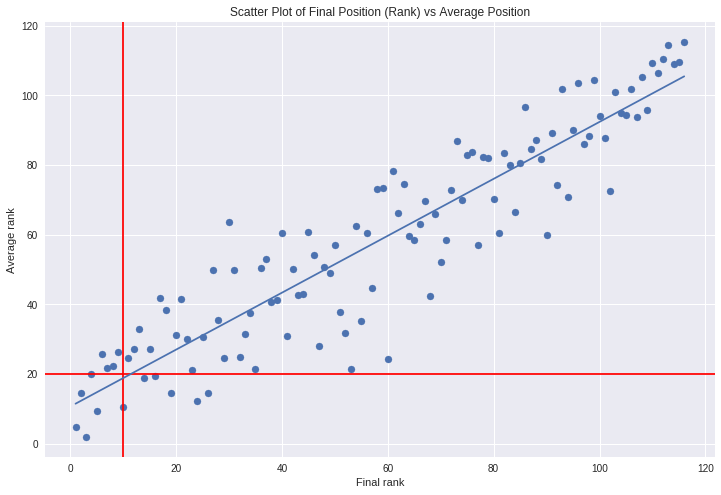

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['AverageRank'])
ax.axhline(20, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Average Position')
plt.xlabel('Final rank')
plt.ylabel('Average rank')

b, m = polyfit(final['Rank'],final['AverageRank'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')

plt.show()


In [0]:
#@title
final.sort_values('AverageRank')[['Player','Rank','Wins','Margin','AverageRank']].set_index('Player').head(20)

,Rank,Wins,Margin,AverageRank
Player,,,,
Napat Vatjaranurathorn,3,17.0,1712,1.875000
Syed Imaad Ali,1,20.0,1694,4.875000
Sohaib Sanaullah,5,16.0,1119,9.458333
Radinka Dissanayake,10,15.0,1086,10.625000
Hasham Hadi Khan,24,14.0,551,12.333333
Janul De Silva,2,19.0,1124,14.500000
Thirandi De Silva,19,14.0,969,14.583333
Qays Sangani,26,14.0,448,14.625000
Pansub Direkwatana,14,15.0,591,18.916667


Average Opponent Rank
--
This is the average rank of all the opponents that someone played against. Small differences between the AOR of two players is not significant. However a large difference implies that one player had a much tougher draw than the other. 

As in the previous metric, we can see that three of the players who were unlucky to miss out have significantly better results than those who won prize money. Hasham and Thirandi have AORs that's around 50% better than some of the prize winners. And players like Thirandi and Hasham seem to make up the majority once again.

The regression line is shown in blue. The perpendicular distance to the line can be used as a visual measure of how a player performed vs the result he achieved. Look at poor Boris!

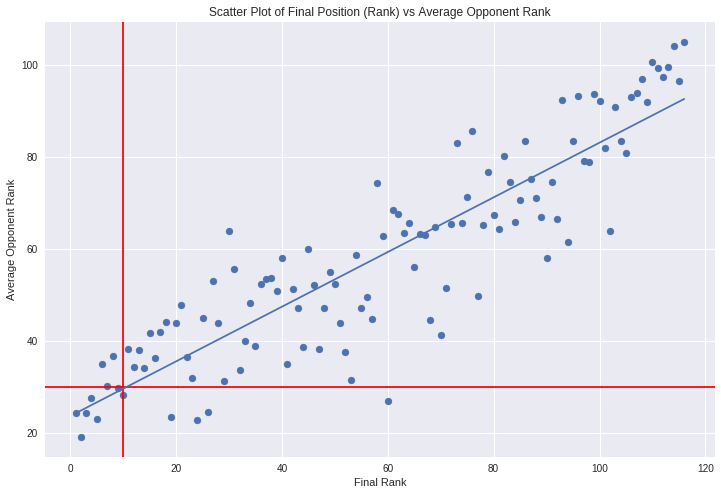

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['AOR'])
ax.axhline(30, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Average Opponent Rank')
plt.xlabel('Final Rank')
plt.ylabel('Average Opponent Rank')

b, m = polyfit(final['Rank'],final['AOR'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')
plt.show()


In [0]:
#@title
final.sort_values('AOR')[['Player','Rank','Wins','Margin','AOR']].set_index('Player').head(20)

,Rank,Wins,Margin,AOR
Player,,,,
Janul De Silva,2,19.0,1124,19.041667
Hasham Hadi Khan,24,14.0,551,22.750000
Sohaib Sanaullah,5,16.0,1119,22.875000
Thirandi De Silva,19,14.0,969,23.291667
Syed Imaad Ali,1,20.0,1694,24.250000
Napat Vatjaranurathorn,3,17.0,1712,24.250000
Qays Sangani,26,14.0,448,24.541667
Boris Chung,60,12.0,89,26.916667
Aabid Ismail,4,16.0,1505,27.458333


Buchholz Score
--
In the other two metrics, lower numbers meant a better performance. In the Buchholz score higher numbers are better. Buchholz score which is one of the systems used in chess for tie breaks has many forms. What we have used here is the sum of opponent scores.

If your opponents themselves managed to win many games, clearly you have played against a group of strong players. On the other hand if your opponents didn't win that many games themselves, their combined strength would be lower.

In the previous graphs, those below the blue regression line could consider themselves hard done by, in the following graph, it's those above the line that have a grivience. And the majority seem to be above the line.

Once again; Poor Boris!

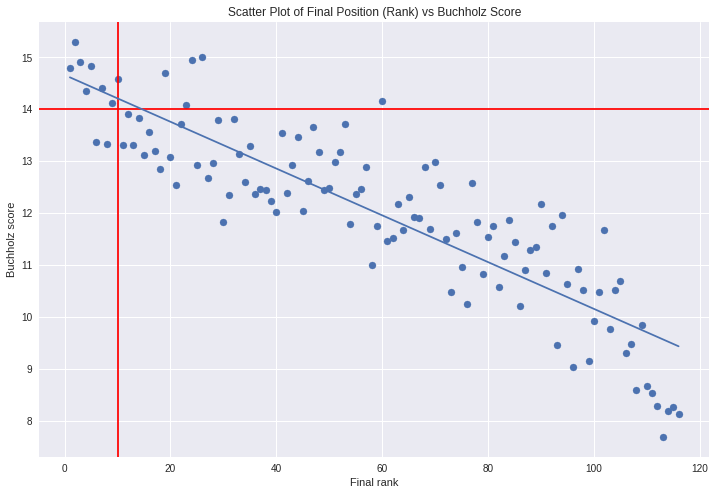

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['Buchholz'])
ax.axhline(14, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Buchholz Score')
plt.xlabel('Final rank')
plt.ylabel('Buchholz score')

b, m = polyfit(final['Rank'],final['Buchholz'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')

plt.show()


In [0]:
#@title
final.sort_values('Buchholz', ascending=False)[['Player','Rank','Wins','Margin','Buchholz']].set_index('Player').head(20)

,Rank,Wins,Margin,Buchholz
Player,,,,
Janul De Silva,2,19.0,1124,15.291667
Qays Sangani,26,14.0,448,15.000000
Hasham Hadi Khan,24,14.0,551,14.937500
Napat Vatjaranurathorn,3,17.0,1712,14.916667
Sohaib Sanaullah,5,16.0,1119,14.833333
Syed Imaad Ali,1,20.0,1694,14.791667
Thirandi De Silva,19,14.0,969,14.687500
Radinka Dissanayake,10,15.0,1086,14.583333
Tarin Pairor,7,16.0,748,14.416667


Modified Buchholz Score
--
The original form of the Buchholz score used in chess does not take the margin into consideration. John Chew's suggestion and common sense dictates that it should be a factor. In the following graph and the table, this was taken in to consideration. The opponents margins were multiplied by an arbitarily chosen factor of 0.0025 and added to the opponents number of wins.

Performances that went unrewarded lie above the regression line and to the right of the red vertical line which identifies the 10th place in the final rankings.

The cluster at the bottom right of the graph includes several players who withdrew from the tournament at various stages. When this cluster is disregarded once again it seems that the majority of players who performed well, were unrewarded.

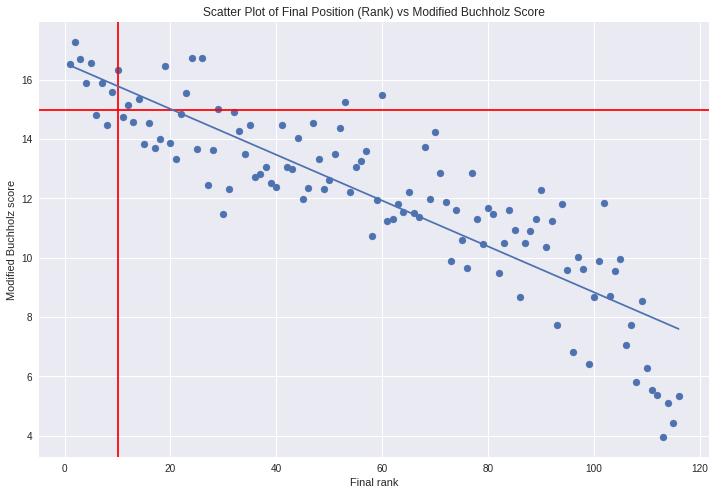

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['AdjustedBuchholz'])
ax.axhline(15, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Modified Buchholz Score')
plt.xlabel('Final rank')
plt.ylabel('Modified Buchholz score')

b, m = polyfit(final['Rank'],final['AdjustedBuchholz'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')

plt.show()


In [0]:
#@title
final.sort_values('AdjustedBuchholz', ascending=False)[['Player','Rank','Wins','Margin','AdjustedBuchholz']].set_index('Player').head(20)

,Rank,Wins,Margin,AdjustedBuchholz
Player,,,,
Janul De Silva,2,19.0,1124,17.282917
Hasham Hadi Khan,24,14.0,551,16.753438
Qays Sangani,26,14.0,448,16.725833
Napat Vatjaranurathorn,3,17.0,1712,16.716667
Sohaib Sanaullah,5,16.0,1119,16.587604
Syed Imaad Ali,1,20.0,1694,16.554792
Thirandi De Silva,19,14.0,969,16.485417
Radinka Dissanayake,10,15.0,1086,16.329167
Aabid Ismail,4,16.0,1505,15.908333


Average Game Score
--
The number of points scored per game can sometimes be a usefull metric. However in this tournament it was heavily distorted by the last few names on the list.

Some of the players at the bottom of the table were withdrawn from the tournament and as a result were awarded a score of zero for the remaining games. This has a drastic effect on the Mean Squared Error and the regression line is almost meaningless. Nevertheless the table of players sorted by average score is an interesting read.


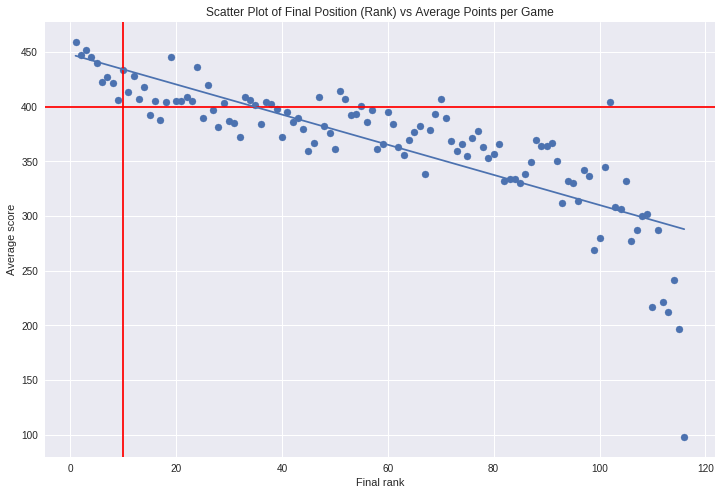

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['AverageScore'])
ax.axhline(400, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Average Points per Game')
plt.xlabel('Final rank')
plt.ylabel('Average score')

b, m = polyfit(final['Rank'],final['AverageScore'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')

plt.show()

In [0]:
#@title
final.sort_values('AverageScore', ascending=False)[['Player','Rank','Wins','Margin','AverageScore']].set_index('Player').head(20)

,Rank,Wins,Margin,AverageScore
Player,,,,
Syed Imaad Ali,1,20.0,1694,459.250000
Napat Vatjaranurathorn,3,17.0,1712,451.333333
Janul De Silva,2,19.0,1124,447.291667
Aabid Ismail,4,16.0,1505,445.208333
Thirandi De Silva,19,14.0,969,444.875000
Sohaib Sanaullah,5,16.0,1119,440.000000
Hasham Hadi Khan,24,14.0,551,436.416667
Radinka Dissanayake,10,15.0,1086,433.041667
Vignesh Pirapaharan,12,15.0,867,427.833333


Sonneborn - Berger Score
--
Sonnerborn - Berger score is also known simply as the SB count or as Neustadtl score. It is a much more interesting metric than any of the others because if you wish to obtain a good SB count, you need to beat good players! Just playing against them isn't enough.

In the Buchholz score, all your opponents wins add upto your Buchholz score, but for SB count, an opponents wins get added to your SB count only if you win against that opponent.



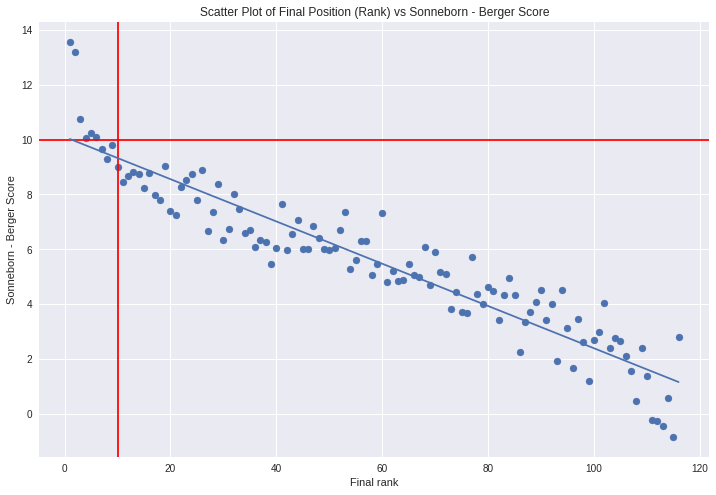

In [0]:
#@title
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.scatter(final['Rank'],final['SB'])
ax.axhline(10, color='red')
ax.axvline(10, color='red')
plt.title('Scatter Plot of Final Position (Rank) vs Sonneborn - Berger Score')
plt.xlabel('Final rank')
plt.ylabel('Sonneborn - Berger Score')

b, m = polyfit(final['Rank'],final['SB'], 1)
plt.plot(final['Rank'], b + m * final['Rank'], '-')

plt.show()

In [0]:
#@title
final.sort_values('SB', ascending=False)[['Player','Rank','Wins','Margin','SB']].set_index('Player').head(20)

,Rank,Wins,Margin,SB
Player,,,,
Syed Imaad Ali,1,20.0,1694,13.566979
Janul De Silva,2,19.0,1124,13.198437
Napat Vatjaranurathorn,3,17.0,1712,10.739583
Sohaib Sanaullah,5,16.0,1119,10.258542
Brian Po,6,16.0,985,10.112396
Aabid Ismail,4,16.0,1505,10.058646
Thomson Law Long Yin,9,16.0,625,9.797396
Tarin Pairor,7,16.0,748,9.673333
Vraj Ashish Jain,8,16.0,680,9.282188


What does the computer think?
--
Yes, computers can think nowadays. Well almost. 

[KMeans](https://en.wikipedia.org/wiki/K-means_clustering) clustering can be used to ask the computer to place the players into groups called clusters. In this mechanism, the cluster size cannot be directly controlled with the machine learning library that has been used here (Scikit Learn).

In the clustering plot below, we have used principal component analysis to reduce the dimensionality to two so that it can be drawn on a two dimensional graph

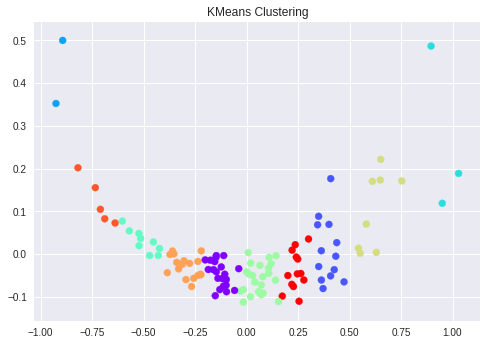

The computer thinks the following group of players (in no particular order) should be among the prize winners


,Rank,Player,Wins
0,1,Syed Imaad Ali,20.0
1,2,Janul De Silva,19.0
2,3,Napat Vatjaranurathorn,17.0
3,4,Aabid Ismail,16.0
4,5,Sohaib Sanaullah,16.0
6,7,Tarin Pairor,16.0
8,9,Thomson Law Long Yin,16.0
9,10,Radinka Dissanayake,15.0
18,19,Thirandi De Silva,14.0
23,24,Hasham Hadi Khan,14.0


In [0]:
#@title
min_max_scaler = preprocessing.MinMaxScaler()
x = final[['Wins','Margin','AverageRank','AOR','AdjustedBuchholz','SB']].copy()
# average rank and AOR, lower values are better while for 
# other feature higher values are better, just to make sure that
# kmeans doesn't get confused, let's invert them
x['AOR'] = 1/x['AOR']
x['AverageRank'] = 1/x['AverageRank']
x_scaled = min_max_scaler.fit_transform(x.values)

pca = PCA(n_components=2).fit_transform(x_scaled)

import random
while True:
    state = random.randint(0,10000)
    kmeans = KMeans(n_clusters=10, random_state=state)
    kmeans.fit(pca)
    labels = kmeans.labels_ 
    c1 = labels[0]
    c2 = labels[1]
    i = 1
    while c2 == c1:
        c2 = labels[i]
        i += 1
    # sklearn kmeans starts of by picking the centroids randomly. That means
    # if you run the code multiple times the results will not always be exactly
    # the same. It also means that the number of members in a cluster may vary by
    # +/- one in different runs. 
    #
    # we want to identify a state when the first two clusters contain at least 
    # ten players. It doesn't really matter whether a given player belongs to the
    # first cluster or the second.
    if len(labels[labels == c1]) + len(labels[labels == c2]) >= 10:
       # print(state, len(labels[labels == labels[0]]), len(labels[labels == labels[1]]))
        break
        
centers = kmeans.cluster_centers_
plt.scatter(pca[:,0],pca[:,1], c=labels, cmap='rainbow') 
plt.title('KMeans Clustering')

plt.show()

final['cluster'] = kmeans.labels_

print('The computer thinks the following group of players (in no particular order) should be among the prize winners')
display(final[(final['cluster']== c1) | (final['cluster']== c2)][['Rank','Player','Wins']])


Conclusion
--
All metrics that we have looked at as well as analysis using machine learning seems to indicate that the majority of players were adversely effected by lagged draw and by the fact that the pairing was King Of The Hill. 

Australian draw is essentially a form of the king of the hill rather than a form of swiss pairing as many people tend to believe. In fact Australian draw has no resemblence whatsoever to swiss.

The only difference between strict King Of The Hill and Australian draw is that in the former, the number of repeats are ignored and players are always paired on a 1 vs 2, 3 vs 4, 5 vs 6 ... basis